# Exploration

In [1]:
__author__ = 'Ardalan'

FOLDER = "/media/shared_ardalan_evgeny/"

import os, sys, time, re, collections, operator, copy, itertools, zipfile
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", 99) # permet de voir toutes les colonnes

In [2]:
def loadFileinZipFile(zip_filename, dtypes=None, parsedate=None, password=None, **kvargs):
    """
        Load file to dataframe.
        """
    with zipfile.ZipFile(zip_filename, 'r') as myzip:
        if password:
            myzip.setpassword(password)

        inside_zip_filename = myzip.filelist[0].filename

        if parsedate:
            pd_data = pd.read_csv(myzip.open(inside_zip_filename), sep=',', parse_dates=parsedate, dtype=dtypes,
                                  **kvargs)
        else:
            pd_data = pd.read_csv(myzip.open(inside_zip_filename), sep=',', dtype=dtypes, **kvargs)
        return pd_data, inside_zip_filename

In [4]:
pdtrain, _ = loadFileinZipFile(FOLDER + "train_merged.csv.zip")
pdtest, _ = loadFileinZipFile(FOLDER + "test_merged.csv.zip")

In [5]:
print("Columns :\n{}".format(pdtrain.columns))
print(pdtrain.shape)
print(pdtest.shape)
pdtrain.head()

Columns :
Index(['itemID_1', 'categoryID_1', 'title_1', 'description_1',
       'images_array_1', 'attrsJSON_1', 'price_1', 'locationID_1', 'metroID_1',
       'lat_1', 'lon_1', 'isDuplicate', 'generationMethod',
       'parentCategoryID_1', 'regionID_1', 'itemID_2', 'categoryID_2',
       'title_2', 'description_2', 'images_array_2', 'attrsJSON_2', 'price_2',
       'locationID_2', 'metroID_2', 'lat_2', 'lon_2', 'parentCategoryID_2',
       'regionID_2'],
      dtype='object')
(2991396, 28)
(1044196, 27)


,itemID_1,categoryID_1,title_1,description_1,images_array_1,attrsJSON_1,price_1,locationID_1,metroID_1,lat_1,lon_1,isDuplicate,generationMethod,parentCategoryID_1,regionID_1,itemID_2,categoryID_2,title_2,description_2,images_array_2,attrsJSON_2,price_2,locationID_2,metroID_2,lat_2,lon_2,parentCategoryID_2,regionID_2
0,1,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1064094, 5252822, 6645873, 6960145, 9230265","{""Вид техники"":""Грузовики""}",300000.0,648140,NaN,64.686946,30.815924,1,1,1,648070,4112648,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1227519, 1374615, 7072137, 8671835","{""Вид техники"":""Грузовики""}",300000.0,648140,NaN,64.686946,30.815924,1,648070
1,523245,39,Ботинки для сноуборда,Продам в хорошем состоянии 2 пары ботинок для ...,"220463, 5878249, 9881846","{""Вид товара"":""Зимние виды спорта""}",2000.0,648140,NaN,64.686946,30.815924,0,1,7,648070,739258,39,Сноуборд,Продам в хорошем состоянии сноуборд размер 150см,"14658215, 5861195","{""Вид товара"":""Зимние виды спорта""}",3000.0,648140,NaN,64.686946,30.815924,7,648070
2,739258,39,Сноуборд,Продам в хорошем состоянии сноуборд размер 150см,"14658215, 5861195","{""Вид товара"":""Зимние виды спорта""}",3000.0,648140,NaN,64.686946,30.815924,0,1,7,648070,2558827,39,Крепления для сноуборда,Продам новые крепления \nЦена 2500 руб,1117365,"{""Вид товара"":""Зимние виды спорта""}",2500.0,648140,NaN,64.686946,30.815924,7,648070
3,280620,9,"Mercedes-Benz E-класс, 2000",Продам или обмен мерседес бенц в хорошем состо...,"11205724, 9136528","{""Марка"":""Mercedes-Benz"", ""Тип автомобиля"":""С ...",230000.0,648140,NaN,64.686946,30.815924,1,1,1,648070,970311,9,"Mercedes-Benz E-класс, 2000","Продам в хорошем состоянии,рестайлинг,двигател...","10160580, 11203649, 2727379, 5014970, 5833347,...","{""Марка"":""Mercedes-Benz"", ""Тип автомобиля"":""С ...",264000.0,648140,NaN,64.686946,30.815924,1,648070
4,970311,9,"Mercedes-Benz E-класс, 2000","Продам в хорошем состоянии,рестайлинг,двигател...","10160580, 11203649, 2727379, 5014970, 5833347,...","{""Марка"":""Mercedes-Benz"", ""Тип автомобиля"":""С ...",264000.0,648140,NaN,64.686946,30.815924,1,1,1,648070,4402682,9,"Mercedes-Benz E-класс, 2000","Продам ,автомат не пинает,масло от замены до ...",NaN,"{""Марка"":""Mercedes-Benz"", ""Модель"":""E-класс"", ...",230000.0,648140,NaN,64.686946,30.815924,1,648070


In [10]:
pdtrain.shape

(2991396, 28)

In [7]:
"Вид техники" = "car type"
"Вид товара" = "type of product"
"Марка" = "brand"\
"Вид одежды" = "cloth type"
"Порода" = "race de chien"
"Сезонность" = "saison pneu"
"Диаметр" = "wiwdth"

SyntaxError: can't assign to literal (<ipython-input-7-0d6d387a2f4e>, line 2)

In [6]:
pdtrain.attrsJSON_1

0                                {"Вид техники":"Грузовики"}
1                        {"Вид товара":"Зимние виды спорта"}
2                        {"Вид товара":"Зимние виды спорта"}
3          {"Марка":"Mercedes-Benz", "Тип автомобиля":"С ...
4          {"Марка":"Mercedes-Benz", "Тип автомобиля":"С ...
5          {"Марка":"ВАЗ (LADA)", "Модель":"2115 Samara",...
6          {"Марка":"Citroen", "Тип автомобиля":"С пробег...
7          {"Марка":"Citroen", "Тип автомобиля":"С пробег...
8          {"Марка":"Nissan", "Тип автомобиля":"С пробего...
9          {"Марка":"Nissan", "Модель":"Almera", "Тип авт...
10         {"Марка":"Ford", "Тип автомобиля":"С пробегом"...
11         {"Марка":"Nissan", "Модель":"Almera", "Тип авт...
12         {"Марка":"Ford", "Модель":"Focus", "Тип автомо...
13         {"Вид одежды":"Женская одежда", "Предмет одежд...
14         {"Вид одежды":"Женская одежда", "Предмет одежд...
15                                  {"Вид товара":"Картины"}
16                      

# Label count

In [5]:
print(pdtrain.isDuplicate.value_counts())
print(pdtrain.generationMethod.value_counts())

0    1727117
1    1264279
Name: isDuplicate, dtype: int64
1    2041604
3     807878
2     141914
Name: generationMethod, dtype: int64


# Number of Nan per column with pourcentage and difference train/test

In [6]:
nb_row = float(pdtrain.shape[0])
for col in pdtrain:
    if col != 'isDuplicate' and col!='generationMethod':
        nb_null_train = pdtrain[col].isnull().sum()
        nb_null_test = pdtest[col].isnull().sum()
        
        ratio_train = 100 * (nb_null_train / nb_row)
        ratio_test = 100 * (nb_null_test / nb_row)
        
        diff_ratio = np.abs(ratio_train - ratio_test)
        
        print("{:<20} :: {:<8} | {:<8} :: {:.0f} | {:.0f} | {:.1f}%".format(col, nb_null_train,nb_null_test, ratio_train, ratio_test, diff_ratio))

itemID_1             :: 0        | 0        :: 0 | 0 | 0.0%
categoryID_1         :: 0        | 0        :: 0 | 0 | 0.0%
title_1              :: 1        | 2        :: 0 | 0 | 0.0%
description_1        :: 52       | 25       :: 0 | 0 | 0.0%
images_array_1       :: 277920   | 117733   :: 9 | 4 | 5.4%
attrsJSON_1          :: 105866   | 38490    :: 4 | 1 | 2.3%
price_1              :: 283894   | 129371   :: 9 | 4 | 5.2%
locationID_1         :: 0        | 0        :: 0 | 0 | 0.0%
metroID_1            :: 1975769  | 740808   :: 66 | 25 | 41.3%
lat_1                :: 0        | 0        :: 0 | 0 | 0.0%
lon_1                :: 0        | 0        :: 0 | 0 | 0.0%
parentCategoryID_1   :: 0        | 0        :: 0 | 0 | 0.0%
regionID_1           :: 0        | 0        :: 0 | 0 | 0.0%
itemID_2             :: 0        | 0        :: 0 | 0 | 0.0%
categoryID_2         :: 0        | 0        :: 0 | 0 | 0.0%
title_2              :: 0        | 0        :: 0 | 0 | 0.0%
description_2        :: 61       | 24

# Frequence of items

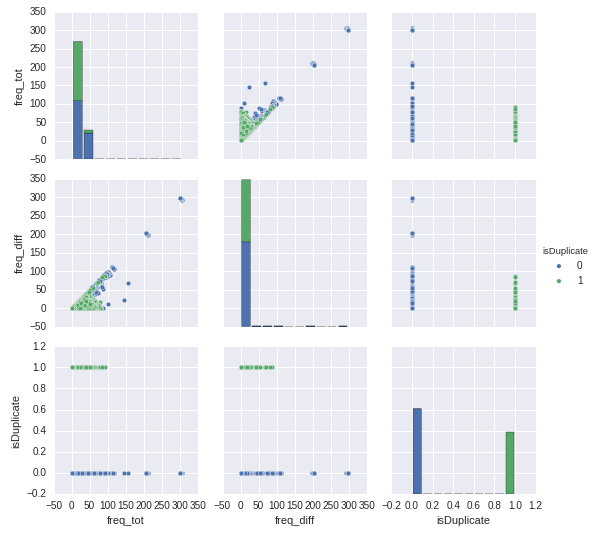

In [7]:
dic_freq_item1 = pdtrain.itemID_1.value_counts().to_dict()
dic_freq_item2 = pdtrain.itemID_2.value_counts().to_dict()
pdtrain['itemID_1_freq'] = pdtrain.itemID_1.apply(lambda r: dic_freq_item1[r])
pdtrain['itemID_2_freq'] = pdtrain.itemID_2.apply(lambda r: dic_freq_item2[r])

pdtrain['freq_tot'] = pdtrain['itemID_1_freq'] + pdtrain['itemID_2_freq']
pdtrain['freq_diff'] = np.abs(pdtrain['itemID_1_freq'] - pdtrain['itemID_2_freq'])

ax = sns.pairplot(pdtrain[['freq_tot','freq_diff','isDuplicate']], hue='isDuplicate')

# Distance between two items

In [98]:
def haversine(pddata, lon1='', lat1='', lon2='', lat2=''):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1 = pddata[lon1].apply(radians).values
    lat1 = pddata[lat1].apply(radians).values
    lon2 = pddata[lon2].apply(radians).values
    lat2 = pddata[lat2].apply(radians).values

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r
pdtrain['geo_dist'] = haversine(pdtrain, lon1='lon_1', lat1='lat_1', lon2='lon_2', lat2='lat_2')

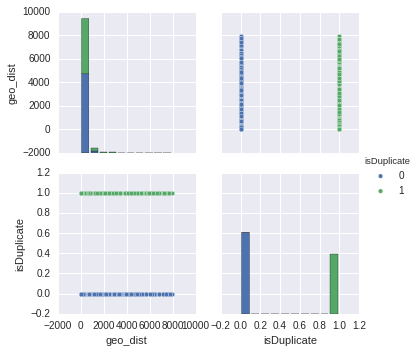

In [63]:
ax = sns.pairplot(pdtrain[['geo_dist', 'isDuplicate']], hue='isDuplicate')

In [69]:
pdtrain[pdtrain.geo_dist < 1]['isDuplicate'].value_counts()

0    1483350
1     987317
Name: isDuplicate, dtype: int64

In [75]:
pdtrain[pdtrain.geo_dist > 100]['isDuplicate'].value_counts()

1    161193
0    102331
Name: isDuplicate, dtype: int64

Index(['itemID_1', 'categoryID_1', 'title_1', 'description_1',
       'images_array_1', 'attrsJSON_1', 'price_1', 'locationID_1', 'metroID_1',
       'lat_1', 'lon_1', 'isDuplicate', 'generationMethod',
       'parentCategoryID_1', 'regionID_1', 'itemID_2', 'categoryID_2',
       'title_2', 'description_2', 'images_array_2', 'attrsJSON_2', 'price_2',
       'locationID_2', 'metroID_2', 'lat_2', 'lon_2', 'parentCategoryID_2',
       'regionID_2', 'itemID_1_freq', 'itemID_2_freq', 'freq_tot', 'freq_diff',
       'geo_dist'],
      dtype='object')

# Title analysis

In [6]:
pdtrain.title_1.fillna("", inplace=True)
pdtrain['title_difflen'] = np.abs(pdtrain.title_2.apply(len) - pdtrain.title_1.apply(len))

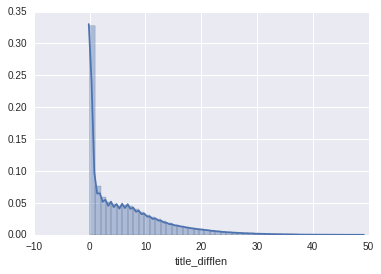

In [7]:
sns.distplot(pdtrain.title_difflen)

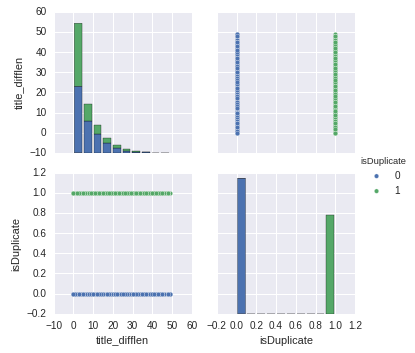

In [140]:
ax = sns.pairplot(pdtrain[['title_difflen', 'isDuplicate']], hue='isDuplicate')

In [144]:
pdtrain[pdtrain.title_difflen > 10]['isDuplicate'].value_counts()

0    413608
1    206104
Name: isDuplicate, dtype: int64

In [145]:
pdtrain[pdtrain.title_difflen < 2]['isDuplicate'].value_counts()

1    658044
0    526344
Name: isDuplicate, dtype: int64

In [159]:
pdtrain[(pdtrain.title_difflen > 30) & (pdtrain.isDuplicate == 1)][['title_1','title_2','description_1','description_2']]

,title_1,title_2,description_1,description_2
30,Запчасти Кузов двигатель кпп задний мост и тд,По запчастям,Фольксваген шаран 1.8 бензин 2008 год пробег 9...,Половинка задний мост двери кулиса 6 ст и мног...
9767,Пуховик в идеальном состоянии с натуральным мехом,Кожаная куртка,"Пуховик в идеальном состоянии , цвет бежевый ,...","Кожаная куртка, размер 42, цвет голубой, состо..."
9827,"Жилетка женская, цвет светлый, с мехом",Жилетка,"Жилетка женская,цвет светлый,с мехом",Цвет:светлый\nНа пуговицах
10570,Щенки,Щенки из профессионального питомника,"Питомник ""Империя Славы"" предлагает щенков Кан...","Питомник ""Империя Славы"" предлагает щенков Кан..."
10605,Замечетельный подарок к новогодним праздникам,Щенки таксы,Щенки карликовой таксы! Родились 25.11.2015. 3...,Чудесный подарок на Новый год! Щенки карликово...
11604,Продам Bridgestone Turanza ER300 205/55 R16 91V,Продам колеса,Bridgestone Turanza ER300\n205/55 R16 91V\n\nд...,Продам колеса Bridgestone Turanza ER300\n205/5...
11766,Литые диски р16 на зимней резине Бричстоун Близак,Brigstoun Blizak,Породам литье на зимней резине Бричстоун Близа...,Породам литые диски на 16 от Митсубиси Оутланд...
11827,Диски OZ,Продам комплект колес из Италии. OZ и pirelli,Продам диски из Италии.,Состояние дисков хорошее. Без трещин. Шинам 2 ...
11926,"Повар, помощник повара, грузчик, работник склада",Ищу работу,"Ищу работу,с официальным оформлением и тд. Зак...","Ищу работу,с официальным оформлением и тд. Зак..."
13615,Мопед irbis alpha 72сс. В использовании 5 месяцев,Irbis Alpha 72cc,Продам мопед ирбис альфа. Менял масло (заливал...,Продам Irbis Alpha на 72cc. За мопедом следил ...


In [161]:
(pdtrain.title_1 == pdtrain.description_1).sum()

14138

In [168]:
pdtrain['is_title_equal_desc_1'] = pdtrain.title_1 == pdtrain.description_1
pdtrain['is_title_equal_desc_2'] = pdtrain.title_2 == pdtrain.description_2

In [175]:
pdtrain[(pdtrain.is_title_equal_desc_1==True) & (pdtrain.is_title_equal_desc_2==True)]['isDuplicate'].value_counts()

0    3831
1    1575
Name: isDuplicate, dtype: int64

,title_2,description_2,isDuplicate
194,Велотренажер,Велотренажер,1
233,Лазертаг в развлекательном клубе Лазерфайт,Лазертаг в развлекательном клубе Лазерфайт,1
242,Ботинки лыжные размер 41,Ботинки лыжные размер 41,1
9781,Куртка,Куртка,1
9884,Продам новые туфли,Продам новые туфли,0
9959,Продам платье,Продам платье,1
11494,Генератор Шевроле Ланос,Генератор Шевроле Ланос,1
11541,Генератор форд фокус 1,Генератор форд фокус 1,1
13539,Жесткий диск для ноутбука HDD 2.5 WD 320GB,Жесткий диск для ноутбука HDD 2.5 WD 320GB,0
16398,"Преобразователь частоты 2.2 кВ, 380-480 В","Преобразователь частоты 2.2 кВ, 380-480 В",1


In [34]:
data = pdtrain[['itemID_1','itemID_2','isDuplicate']].groupby('itemID_1').agg({
        "itemID_2": lambda x: tuple(x),
        "isDuplicate": lambda x: tuple(x),
    })

In [36]:
data['nb_label'] = data.isDuplicate.apply(lambda r: len(r))

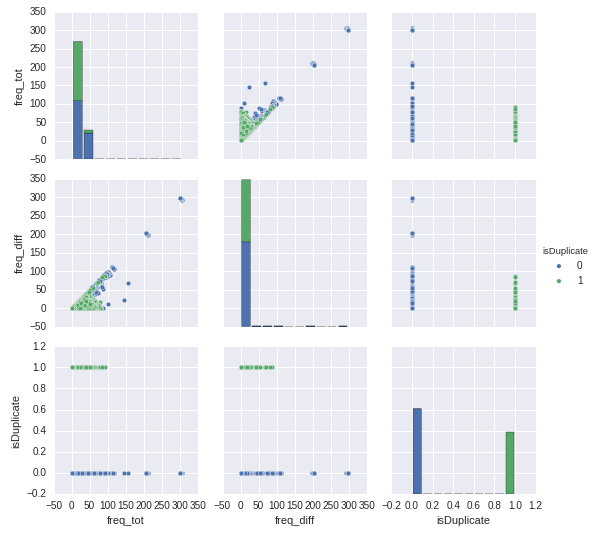

In [93]:
pdtrain.isDuplicate.value_counts()

0    1727117
1    1264279
Name: isDuplicate, dtype: int64

In [100]:
pdtrain[pdtrain.freq_tot > 10]['isDuplicate'].value_counts()

0    755612
1     84317
Name: isDuplicate, dtype: int64

In [96]:
pdtrain.columns

Index(['itemID_1', 'categoryID_1', 'title_1', 'description_1',
       'images_array_1', 'attrsJSON_1', 'price_1', 'locationID_1', 'metroID_1',
       'lat_1', 'lon_1', 'isDuplicate', 'generationMethod',
       'parentCategoryID_1', 'regionID_1', 'itemID_2', 'categoryID_2',
       'title_2', 'description_2', 'images_array_2', 'attrsJSON_2', 'price_2',
       'locationID_2', 'metroID_2', 'lat_2', 'lon_2', 'parentCategoryID_2',
       'regionID_2', 'itemID_1_freq', 'itemID_2_freq', 'freq_tot', 'freq_diff',
       'geo_dist'],
      dtype='object')